## Исследуем Таиланд и Bangkok metropolis с помощью Geopandas

Сначала построим карту Таиланда, нанесем на неё 20-ку крупнейших городов. Найдем на карте "город-герой" Pattaya-city. Затем вернёмся в Бангкок, поищем на карте достопримечательности и посмотрим из чего состоит этот  метрополис

Начнем с импорта библиотек

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

Идём по этой ссылке https://data.humdata.org/dataset/thailand-administrative-boundaries и скачиваем файл tha_adm_rtsd_itos_20190221_shp_part_1.zip с геополигонами по Таиланду. В самом архиве много файлов, но нам понадобятся три: tha_admbnda_adm0_rtsd_20190221.shp с полигонами для границ страны, и tha_admbnda_adm1_rtsd_20190221.shp с полигонами для провинций и tha_admbnda_adm2_rtsd_20190221.shp с полигонами для районов. Оттуда же скачиваем файл tha_adminboundaries_tabulardata.xlsx. В нем есть инфа с названиями провинций и их почтовые коды. (это нам понадобится в дальнейшем)

In [3]:
file = 'C:/Users/Vladimir/Coding/CSV_Datasets/Thailand_geomaps/tha_admbnda_adm0_rtsd_20190221.shp'
THA0 = gpd.read_file(file) # полигоны для страны

file1 = 'C:/Users/Vladimir/Coding/CSV_Datasets/Thailand_geomaps/tha_admbnda_adm1_rtsd_20190221.shp'
THA1 = gpd.read_file(file1) # полигоны для провинций

file2 = 'C:/Users/Vladimir/Coding/CSV_Datasets/Thailand_geomaps/tha_admbnda_adm2_rtsd_20190221.shp'
THA2 = gpd.read_file(file2) # полигоны для районов (округов)

In [4]:
THA0.head()

,geometry
0,"MULTIPOLYGON (((100.09034 6.42574, 100.08995 6..."


Как видим, в первом файле только полигоны. Посмотрим, что из них можно построить

<AxesSubplot:>

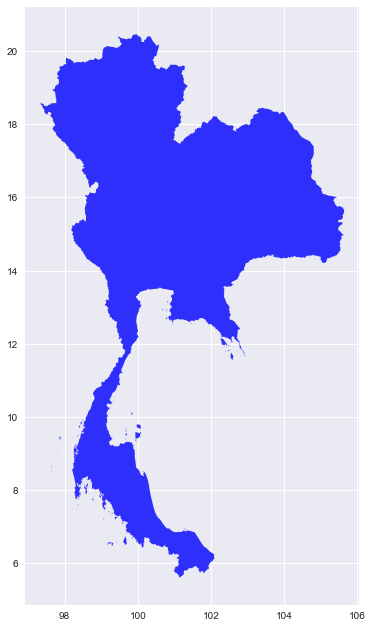

In [5]:
plt.rcParams['figure.figsize'] = [16, 11]


fig, ax = plt.subplots()

THA0.plot(ax=ax, color='blue', alpha=0.8)

Итак, у нас есть карта с территорией  Таиланда. Еще в моей коллекции был один датасет с данными по населению Таиланда в разрезе провинций. но там были только координаты, без полигонов. Попробуем использовать эту инфу в нашем исследовании

In [22]:
th_mueang = pd.read_excel ('C:/Users/Vladimir/Coding/CSV_Datasets/Thailand_geomaps/thaiamphur.xls', sheet_name='Thai_amphur')
th_mueang.head()

,amphurEN,amphurTH,changwat,lat,long,pop,area,zip,Changwat_EN,PostalCode
0,Akat Amnuai,อากาศอำนวย,Sakon Nakhon,17.5967,103.9750,67328.0,115.1,47170.0,Sakon Nakhon,TH47
1,Mueang Amnat Charoen,เมืองอำนาจเจริญ,Amnat Charoen,15.8583,104.6294,128992.0,216.2,37000.0,Amnat Charoen,TH37
2,Amphawa,อัมพวา,Samut Songkhram,13.4247,99.9572,57161.0,365.2,75110.0,Samut Songkhram,TH75
3,Mueang Ang Thong,เมืองอ่างทอง,Ang Thong,14.5886,100.4533,55974.0,544.5,14000.0,Ang Thong,TH15
4,Ao Luek,อ่าวลึก,Krabi,8.3775,98.7217,48474.0,62.7,81110.0,Krabi,TH81


In [23]:
th_mueang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   amphurEN     927 non-null    object 
 1   amphurTH     927 non-null    object 
 2   changwat     927 non-null    object 
 3   lat          927 non-null    float64
 4   long         927 non-null    float64
 5   pop          927 non-null    float64
 6   area         927 non-null    float64
 7   zip          926 non-null    float64
 8   Changwat_EN  927 non-null    object 
 9   PostalCode   927 non-null    object 
dtypes: float64(5), object(5)
memory usage: 72.5+ KB


In [24]:
th_mueang.shape

(927, 10)

Сделаем группировку по населению и отфильтруем топ 20 провинций с их столицами

In [25]:
grouped  = th_mueang.groupby(['amphurEN']).agg({'pop': np.sum
                                     ,'lat': pd.Series.unique,
                                    'long': pd.Series.unique}
                                              )
grouped.sort_values(by=['pop'], ascending=False, inplace=True)
top20=grouped.head(20)
top20

,pop,lat,long
amphurEN,,,
Mueang Samut Prakan,460141.0,13.6006,100.597
Mueang Nakhon Ratchasima,454647.0,14.9711,102.1
Mueang Udon Thani,397049.0,17.415,102.787
Mueang Khon Kaen,382156.0,16.4383,102.839
Hat Yai,359813.0,7.0019,100.457
Mueang Nonthaburi,353923.0,13.8622,100.513
Mueang Nakhon Pathom,271391.0,13.8197,100.066
Mueang Nakhon Si Thammarat,266613.0,8.42,99.9633
Mueang Phitsanulok,264387.0,16.8247,100.259


Сразу обращаем внимание, что в списке нет Бангкока, хотя он по факту самый большой город страны. Все от того, что сам Бангкок состоит из маленьких райнов, которые в сумме дают многомиллионный город, но по отдельности они все за пределами нашей двадцатки

In [26]:
top20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Mueang Samut Prakan to Bang Lamung
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pop     20 non-null     float64
 1   lat     20 non-null     object 
 2   long    20 non-null     object 
dtypes: float64(1), object(2)
memory usage: 640.0+ bytes


В сгруппированном датафрейме координаты долготы и широты имеют строковый тип. Исправим это.

In [27]:
top20['lat'] = top20['lat'].apply(pd.to_numeric)
top20['long'] = top20['long'].apply(pd.to_numeric)

<ipython-input-27-0586b2a9ee9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20['lat'] = top20['lat'].apply(pd.to_numeric)
<ipython-input-27-0586b2a9ee9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20['long'] = top20['long'].apply(pd.to_numeric)


In [28]:
top20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Mueang Samut Prakan to Bang Lamung
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pop     20 non-null     float64
 1   lat     20 non-null     float64
 2   long    20 non-null     float64
dtypes: float64(3)
memory usage: 640.0+ bytes


Ок. Теперь попробуем нанести на карту столицы  самых крупных провинций

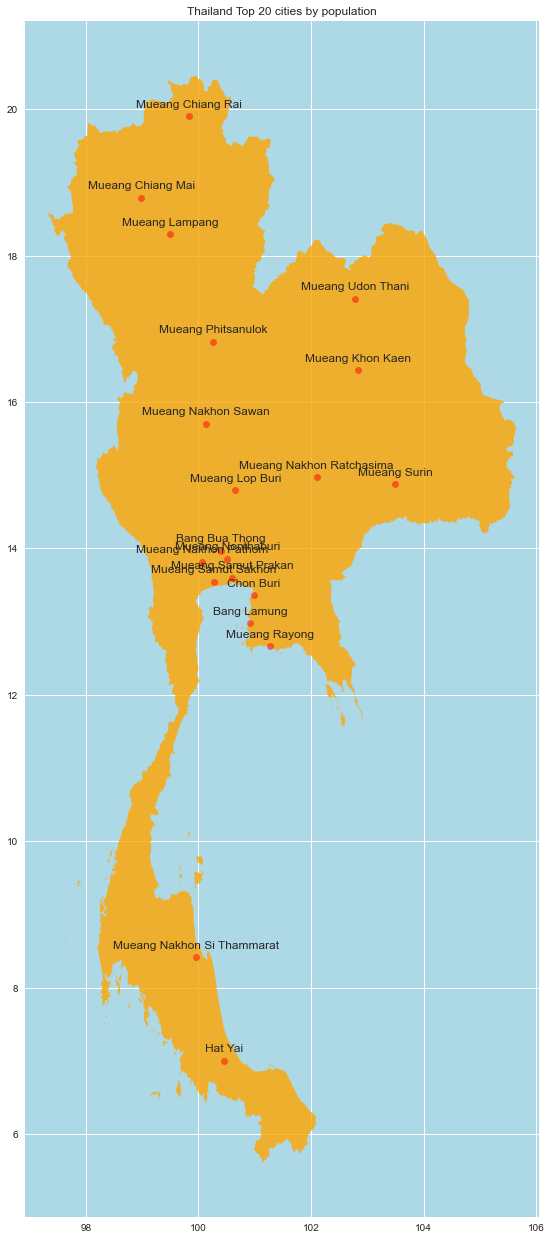

In [30]:
plt.rcParams['figure.figsize'] = [16, 22]


fig, ax = plt.subplots()

THA0.plot(ax=ax, color='orange', alpha=0.8)

for index, row in top20.iterrows():
    
    ax.plot(
        row['long'],
        row['lat'],
        marker='o',
        c='red', 
        alpha=0.5
    )

    ax.text(
        x = row['long'], 
        y = row['lat'] + 0.12, 
        s=index, 
        fontsize=12,
        ha='center', 
    )  
    
    ax.set(
        title='Thailand Top 20 cities by population', 
        aspect=1.3, 
        facecolor='lightblue'
    )

In [31]:
THA1.head() # это дф с полигонами провинций

,geometry
0,"POLYGON ((104.95982 16.28359, 104.95986 16.283..."
1,"POLYGON ((100.33319 14.79853, 100.33341 14.798..."
2,"POLYGON ((100.61389 13.95462, 100.61428 13.954..."
3,"POLYGON ((103.40497 18.44898, 103.40619 18.448..."
4,"POLYGON ((102.93029 15.79514, 102.93029 15.795..."


Вот так скучно будет выглядеть карта провиниц Таиланда, потому что у нас есть только полигоны, но нет самих названий.

<AxesSubplot:>

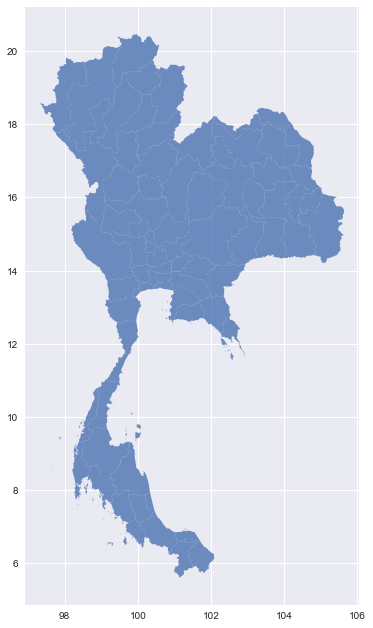

In [35]:
plt.rcParams['figure.figsize'] = [16, 11]


fig, ax = plt.subplots()

#THA_province.plot(ax=ax, color='blue', alpha=0.8)
THA1.plot(ax=ax,  alpha=0.8)

In [36]:
# Подключим файл с данными по провинциям Таиланда
df1 = pd.read_excel ('C:/Users/Vladimir/Coding/CSV_Datasets/Thailand_geomaps/tha_adminboundaries_tabulardata.xls', sheet_name='Admin1')
df1.head()

,OBJECTID,Shape,admin1Name_en,admin1Name_th,admin1Pcode,admin1RefName,admin1AltName1_en,admin1AltName2_en,admin1AltName1_th,admin1AltName2_th,admin0Name_en,admin0Name_th,admin0Pcode,date,validOn,validTo,Shape_Length,Shape_Area
0,1,Polygon,Amnat Charoen,อำนาจเจริญ,TH37,<Null>,<Null>,<Null>,<Null>,<Null>,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,3.927244,0.275313
1,2,Polygon,Ang Thong,อ่างทอง,TH15,<Null>,<Null>,<Null>,<Null>,<Null>,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,1.739908,0.079210
2,3,Polygon,Bangkok,กรุงเทพมหานคร,TH10,<Null>,<Null>,<Null>,<Null>,<Null>,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,2.417227,0.131339
3,4,Polygon,Bueng Kan,บึงกาฬ,TH38,<Null>,<Null>,<Null>,<Null>,<Null>,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,4.414998,0.340784
4,5,Polygon,Buri Ram,บุรีรัมย์,TH31,<Null>,<Null>,<Null>,<Null>,<Null>,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,8.701860,0.844537


In [37]:
df1.shape # У нас всего 77 провинций

(77, 18)

In [38]:
# мерджим два дф по индексу 
tha = pd.merge(df1, THA1,how = 'left', left_index=True, right_index=True)
tha.head()

,OBJECTID,Shape,admin1Name_en,admin1Name_th,admin1Pcode,admin1RefName,admin1AltName1_en,admin1AltName2_en,admin1AltName1_th,admin1AltName2_th,admin0Name_en,admin0Name_th,admin0Pcode,date,validOn,validTo,Shape_Length,Shape_Area,geometry
0,1,Polygon,Amnat Charoen,อำนาจเจริญ,TH37,<Null>,<Null>,<Null>,<Null>,<Null>,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,3.927244,0.275313,"POLYGON ((104.95982 16.28359, 104.95986 16.283..."
1,2,Polygon,Ang Thong,อ่างทอง,TH15,<Null>,<Null>,<Null>,<Null>,<Null>,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,1.739908,0.079210,"POLYGON ((100.33319 14.79853, 100.33341 14.798..."
2,3,Polygon,Bangkok,กรุงเทพมหานคร,TH10,<Null>,<Null>,<Null>,<Null>,<Null>,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,2.417227,0.131339,"POLYGON ((100.61389 13.95462, 100.61428 13.954..."
3,4,Polygon,Bueng Kan,บึงกาฬ,TH38,<Null>,<Null>,<Null>,<Null>,<Null>,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,4.414998,0.340784,"POLYGON ((103.40497 18.44898, 103.40619 18.448..."
4,5,Polygon,Buri Ram,บุรีรัมย์,TH31,<Null>,<Null>,<Null>,<Null>,<Null>,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,8.701860,0.844537,"POLYGON ((102.93029 15.79514, 102.93029 15.795..."


In [39]:
# возьмем только нужные нам столбцы
tha1 = tha[['admin1Name_en','admin1Pcode','geometry', 'Shape_Length','Shape_Area']]
tha1.head()

,admin1Name_en,admin1Pcode,geometry,Shape_Length,Shape_Area
0,Amnat Charoen,TH37,"POLYGON ((104.95982 16.28359, 104.95986 16.283...",3.927244,0.275313
1,Ang Thong,TH15,"POLYGON ((100.33319 14.79853, 100.33341 14.798...",1.739908,0.079210
2,Bangkok,TH10,"POLYGON ((100.61389 13.95462, 100.61428 13.954...",2.417227,0.131339
3,Bueng Kan,TH38,"POLYGON ((103.40497 18.44898, 103.40619 18.448...",4.414998,0.340784
4,Buri Ram,TH31,"POLYGON ((102.93029 15.79514, 102.93029 15.795...",8.701860,0.844537


In [40]:
tha1.dtypes # проверим на всякий случай типы

admin1Name_en      object
admin1Pcode        object
geometry         geometry
Shape_Length      float64
Shape_Area        float64
dtype: object

И хотя в нашем дф есть столбец с типом геоданные, как показала практика, после операции merge необходимо
дополнительно переопределять тип датафрейма, иначе карта не отрисовывается. Делаем переопределение такой командой:

In [41]:
from geopandas import GeoDataFrame
tha1 = GeoDataFrame(tha1)

### Теперь строим карту c провинциями

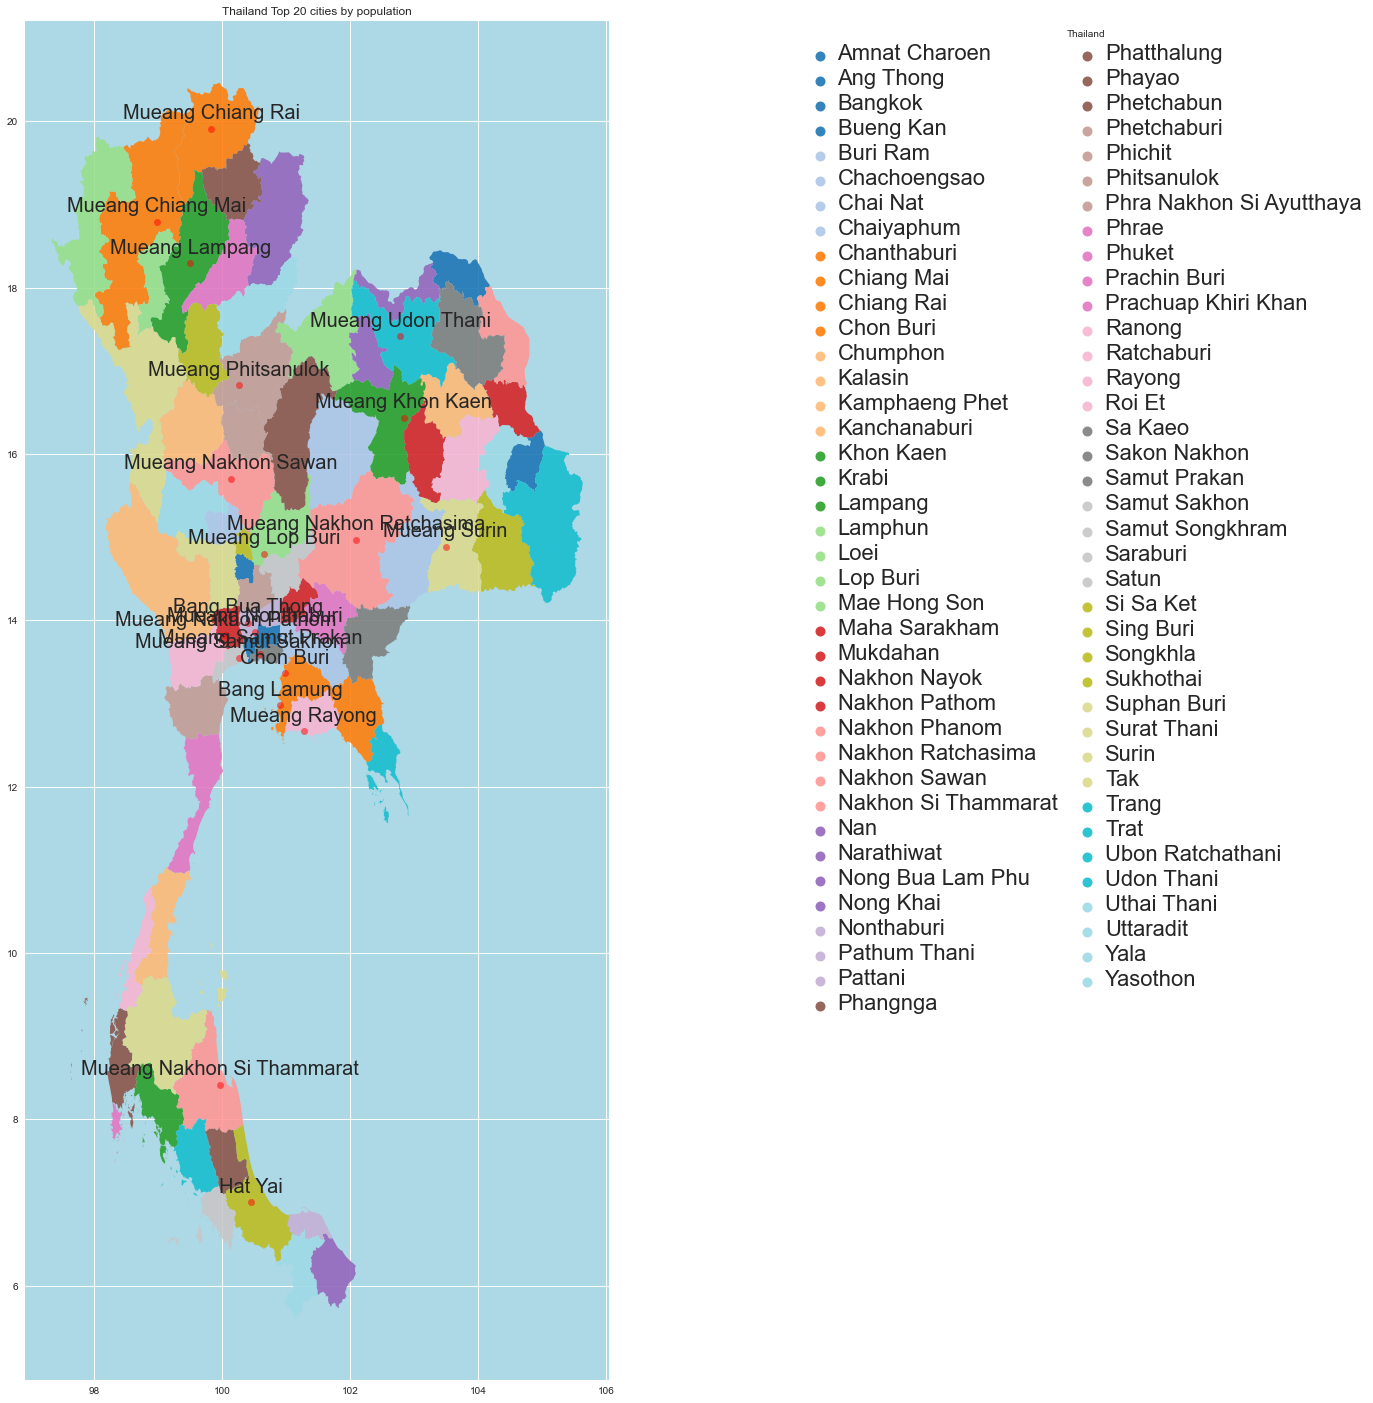

In [48]:
plt.rcParams['figure.figsize'] = [16,25]


fig, ax = plt.subplots()

tha1.plot(
    ax=ax, 
    column='admin1Name_en', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Thailand', "ncol": 2,'loc': 'upper right', "bbox_to_anchor": (1.005,0.1,1.3,0.9)},
    cmap='tab20',
    alpha=0.9
)

ax.set(aspect=1.8)
plt.setp(ax.get_legend().get_texts(), fontsize='22')

for index, row in top20.iterrows():
    
    ax.plot(
        row['long'],
        row['lat'],
        marker='o',
        c='red', 
        alpha=0.5
    )

    ax.text(
        x = row['long'], 
        y = row['lat'] + 0.12, 
        s=index, 
        fontsize=20,
        ha='center', 
    )  
    
    ax.set(
        title='Thailand Top 20 cities by population', 
        aspect=1.3, 
        facecolor='lightblue'
    )

In [49]:
# Подключим файл с данными по районам, входящих в состав провинций
df2 = pd.read_excel ('C:/Users/Vladimir/Coding/CSV_Datasets/Thailand_geomaps/tha_adminboundaries_tabulardata.xlsx', sheet_name='Admin2', engine='openpyxl')
df2.head()

,OBJECTID *,Shape *,admin2Name_en,admin2Name_th,admin2Pcode,admin2RefName,admin2AltName1_en,admin2AltName2_en,admin2AltName1_th,admin2AltName2_th,...,admin1Name_th,admin1Pcode,admin0Name_en,admin0Name_th,admin0Pcode,date,validOn,validTo,Shape_Length,Shape_Area
0,1,Polygon,Akat Amnuai,อากาศอำนวย,TH4711,<Null>,<Null>,<Null>,<Null>,<Null>,...,สกลนคร,TH47,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,1.675375,0.048338
1,2,Polygon,Amphawa,อัมพวา,TH7503,<Null>,<Null>,<Null>,<Null>,<Null>,...,สมุทรสงคราม,TH75,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,0.890470,0.014271
2,3,Polygon,Ao Luek,อ่าวลึก,TH8105,<Null>,<Null>,<Null>,<Null>,<Null>,...,กระบี่,TH81,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,1.886297,0.054916
3,4,Polygon,Aranyaprathet,อรัญประเทศ,TH2706,<Null>,<Null>,<Null>,<Null>,<Null>,...,สระแก้ว,TH27,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,2.022411,0.061416
4,5,Polygon,At Samat,อาจสามารถ,TH4514,<Null>,<Null>,<Null>,<Null>,<Null>,...,ร้อยเอ็ด,TH45,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,1.153553,0.035097


In [50]:
df2.shape # итого имеем 928 районов

(928, 21)

In [51]:
# также как и прошлый раз мерджим два дф по индексу
tha22 = pd.merge(df2, THA2, how = 'left', left_index=True, right_index=True)
tha22.head()

,OBJECTID *,Shape *,admin2Name_en,admin2Name_th,admin2Pcode,admin2RefName,admin2AltName1_en,admin2AltName2_en,admin2AltName1_th,admin2AltName2_th,...,admin1Pcode,admin0Name_en,admin0Name_th,admin0Pcode,date,validOn,validTo,Shape_Length,Shape_Area,geometry
0,1,Polygon,Akat Amnuai,อากาศอำนวย,TH4711,<Null>,<Null>,<Null>,<Null>,<Null>,...,TH47,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,1.675375,0.048338,"POLYGON ((103.92408 17.81515, 103.92436 17.815..."
1,2,Polygon,Amphawa,อัมพวา,TH7503,<Null>,<Null>,<Null>,<Null>,<Null>,...,TH75,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,0.890470,0.014271,"POLYGON ((99.99695 13.48059, 99.99714 13.48047..."
2,3,Polygon,Ao Luek,อ่าวลึก,TH8105,<Null>,<Null>,<Null>,<Null>,<Null>,...,TH81,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,1.886297,0.054916,"MULTIPOLYGON (((98.69051 8.20364, 98.69006 8.2..."
3,4,Polygon,Aranyaprathet,อรัญประเทศ,TH2706,<Null>,<Null>,<Null>,<Null>,<Null>,...,TH27,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,2.022411,0.061416,"POLYGON ((102.48016 13.87030, 102.48026 13.870..."
4,5,Polygon,At Samat,อาจสามารถ,TH4514,<Null>,<Null>,<Null>,<Null>,<Null>,...,TH45,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,<Null>,1.153553,0.035097,"POLYGON ((103.87868 15.94941, 103.87884 15.949..."


In [52]:
tha2 = tha22[['admin1Name_en','admin1Pcode','admin2Name_en','geometry']]
tha2.head()

,admin1Name_en,admin1Pcode,admin2Name_en,geometry
0,Sakon Nakhon,TH47,Akat Amnuai,"POLYGON ((103.92408 17.81515, 103.92436 17.815..."
1,Samut Songkhram,TH75,Amphawa,"POLYGON ((99.99695 13.48059, 99.99714 13.48047..."
2,Krabi,TH81,Ao Luek,"MULTIPOLYGON (((98.69051 8.20364, 98.69006 8.2..."
3,Sa Kaeo,TH27,Aranyaprathet,"POLYGON ((102.48016 13.87030, 102.48026 13.870..."
4,Roi Et,TH45,At Samat,"POLYGON ((103.87868 15.94941, 103.87884 15.949..."


Итак, у нас есть дф с полигонами и названиями районов. Можно построить карту просто с границами.
Но мы пойдем чуть дальше, ведь у нас есть инфо по населению каждого района. Попробуем смерджить еще раз датафреймы, чтобы вывести на карту еще и уровень населения в каждом районе

In [53]:
tha_pop = pd.merge(tha2, th_mueang, how = 'left', left_on='admin2Name_en', right_on='amphurEN')
tha_pop.head()

,admin1Name_en,admin1Pcode,admin2Name_en,geometry,amphurEN,amphurTH,changwat,lat,long,pop,area,zip,Changwat_EN,PostalCode
0,Sakon Nakhon,TH47,Akat Amnuai,"POLYGON ((103.92408 17.81515, 103.92436 17.815...",Akat Amnuai,อากาศอำนวย,Sakon Nakhon,17.5967,103.9750,67328.0,115.1,47170.0,Sakon Nakhon,TH47
1,Samut Songkhram,TH75,Amphawa,"POLYGON ((99.99695 13.48059, 99.99714 13.48047...",Amphawa,อัมพวา,Samut Songkhram,13.4247,99.9572,57161.0,365.2,75110.0,Samut Songkhram,TH75
2,Krabi,TH81,Ao Luek,"MULTIPOLYGON (((98.69051 8.20364, 98.69006 8.2...",Ao Luek,อ่าวลึก,Krabi,8.3775,98.7217,48474.0,62.7,81110.0,Krabi,TH81
3,Sa Kaeo,TH27,Aranyaprathet,"POLYGON ((102.48016 13.87030, 102.48026 13.870...",Aranyaprathet,อรัญประเทศ,Sa Kaeo,13.7008,102.5117,83171.0,101.3,27120.0,Sa kaeo,TH27
4,Roi Et,TH45,At Samat,"POLYGON ((103.87868 15.94941, 103.87884 15.949...",At Samat,อาจสามารถ,Roi Et,15.8436,103.8789,74711.0,164.4,45160.0,Roi Et,TH45


In [54]:
tha_pop.shape

(956, 14)

In [55]:
# смотрим типы полей
tha_pop.dtypes

admin1Name_en      object
admin1Pcode        object
admin2Name_en      object
geometry         geometry
amphurEN           object
amphurTH           object
changwat           object
lat               float64
long              float64
pop               float64
area              float64
zip               float64
Changwat_EN        object
PostalCode         object
dtype: object

In [56]:
# переопределяем дф после мерджа
tha_pop = GeoDataFrame(tha_pop)

### Строим тепловую карту по населению райнов Таиланда

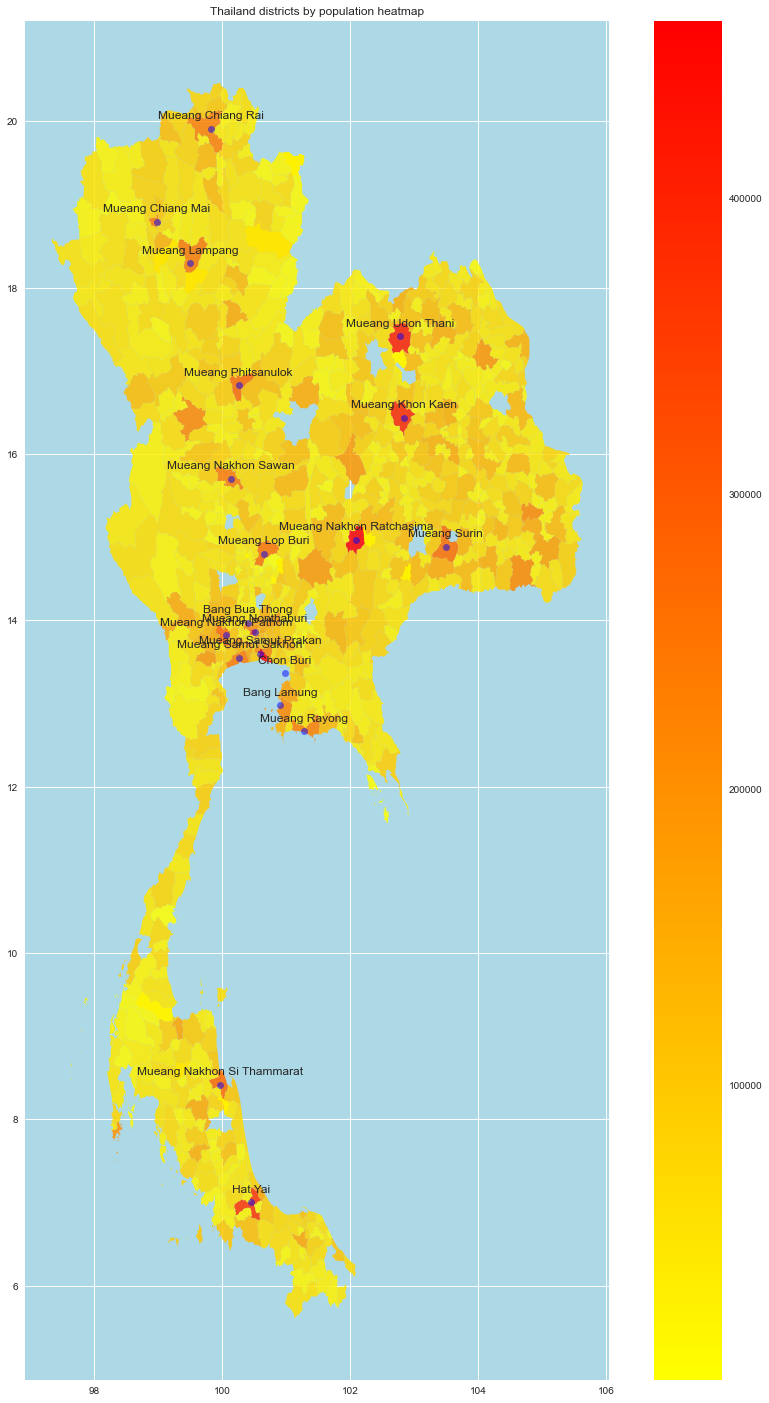

In [57]:
plt.rcParams['figure.figsize'] = [16,25]


fig, ax = plt.subplots()

tha_pop.plot(
    ax=ax, 
    column='pop', 
    categorical=False, 
    legend=True, 
    #legend_kwds={'title':'Thailand', "ncol": 2,'loc': 'upper right', "bbox_to_anchor": (1.005,0.1,1.3, 1)},
    #cmap='autumn_r',
    cmap='autumn_r',
    alpha=0.85
)

ax.set(aspect=1.8)


for index, row in top20.iterrows():
    
    ax.plot(
        row['long'],
        row['lat'],
        marker='o',
        c='blue', 
        alpha=0.5
    )

    ax.text(
        x = row['long'], 
        y = row['lat'] + 0.12, 
        s=index, 
        fontsize=12,
        ha='center', 
    )  
    
    ax.set(
        title='Thailand districts by population heatmap', 
        aspect=1.3, 
        facecolor='lightblue'
    )

Как видим, метки с названиями самых крупных городов все имеют более насыщенный красный цвет, что говорит о высоком уровне населения в этих районах

ОК. Теперь посмотрим поближе на Бангкок

[Text(0.5, 1.0, 'Bangkok metropolis population'), None, None]

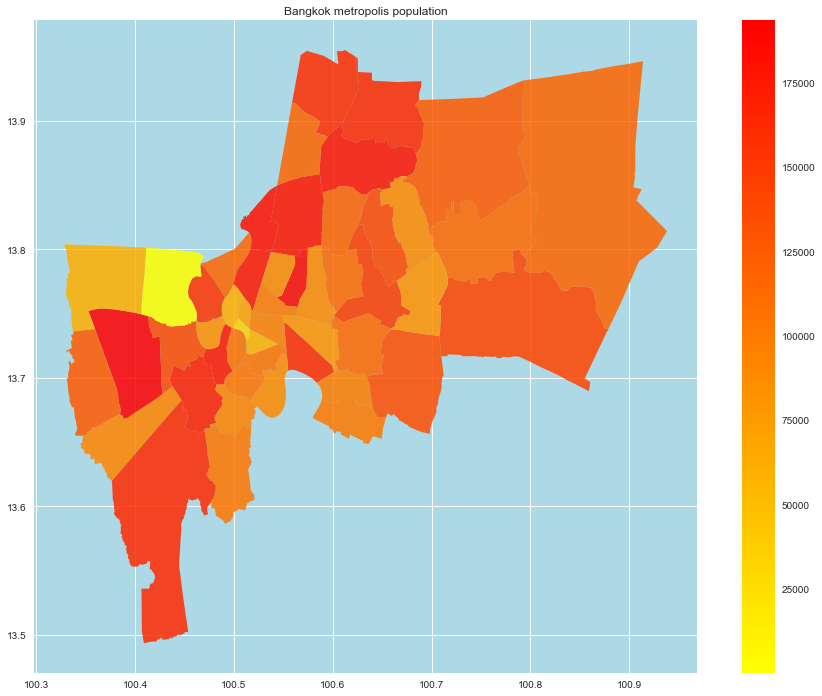

In [59]:
bkk_pop = tha_pop.query('Changwat_EN == "Bangkok"')

plt.rcParams['figure.figsize'] = [16,12]

fig, ax = plt.subplots()

bkk_pop.plot(
    ax=ax, 
    column='pop', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.85
    )



ax.set(
        title='Bangkok metropolis population', 
        aspect=1.3, 
        facecolor='lightblue'
        )

Это и есть Бангкок. Каждый "квадратик" - это отдельный район. Выведем их имена с населением в таблице

In [95]:
grouped_bkk  = th_mueang.groupby(['Changwat_EN','amphurEN', ]).agg({'pop': np.sum
                                     ,'lat': pd.Series.unique,
                                    'long': pd.Series.unique}
                                              )
grouped_bkk.sort_values(by=['pop'], ascending=False, inplace=True)
grouped_bkk.loc['Bangkok']

,pop,lat,long
amphurEN,,,
Bang Khae,193449.0,13.696100,100.409400
Din Daeng,186319.0,13.769700,100.552800
Bang Sue,180598.0,13.809700,100.537200
Bang Khen,177062.0,13.873900,100.596400
Chatuchak,176501.0,13.828600,100.559700
Thon Buri,175768.0,13.725000,100.485800
Dusit,175658.0,13.776900,100.520600
Chom Thong-1,167794.0,13.677200,100.484700
Sai Mai,161749.0,13.919200,100.645800


Посчитаем население Бангкока (цифры довольно устаревшие, т.к датасет создан на основе парсинга Википедии, которая давно не обновлялась)

In [104]:
grouped_bkk.loc['Bangkok']['pop'].sum()

5906357.2

А что в Гугле? Тоже 2010 год (

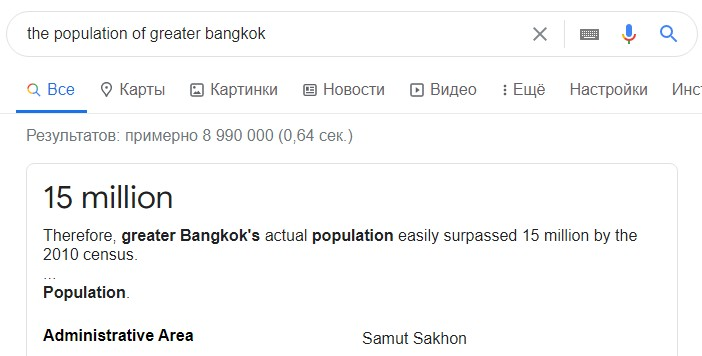

А теперь выведем провинцию Чонбури

[Text(0.5, 1.0, 'Chonbury administrative District'), None, None]

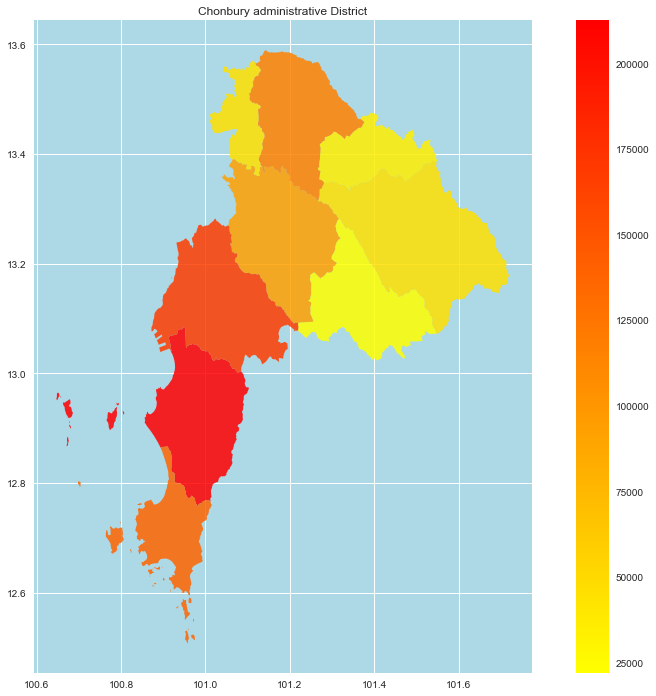

In [61]:
chb_pop = tha_pop.query('Changwat_EN == "Chon Buri"')

plt.rcParams['figure.figsize'] = [16,12]

fig, ax = plt.subplots()

chb_pop.plot(
    ax=ax, 
    column='pop', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.85
    )



ax.set(
        title='Chonbury administrative District', 
        aspect=1.3, 
        facecolor='lightblue'
        )

<img src="https://pattaya.guide/wp-content/uploads/walking-street-02.jpg" width=750 >                    Фото из доковидных времён


Где-то в этой провинции находится один из крупных туристических цетров Таиланда - Паттайа. Т.к. сам город не является районным центром, то его координат нет в наших данных. Попробуем найти их через базу данных Nominatim, которая позволяет вычислить координаты точки по имеющимуся названию. Какая самая известная достопримечательность Паттайи ? Правильно - Walking Street. Вот её коордианты мы и будеи искать. 

In [63]:
from geopy import Nominatim

locator = Nominatim(user_agent='myGeocoder')

location = locator.geocode('Pattaya Walking Street')

ptt = {'Pattaya City':[location.longitude, location.latitude]}

print(ptt)

{'Pattaya City': [100.8746501, 12.9274274]}


Наносим точку с координатами на нашу карту

[Text(0.5, 1.0, 'Location of Pattaya city'), None, None]

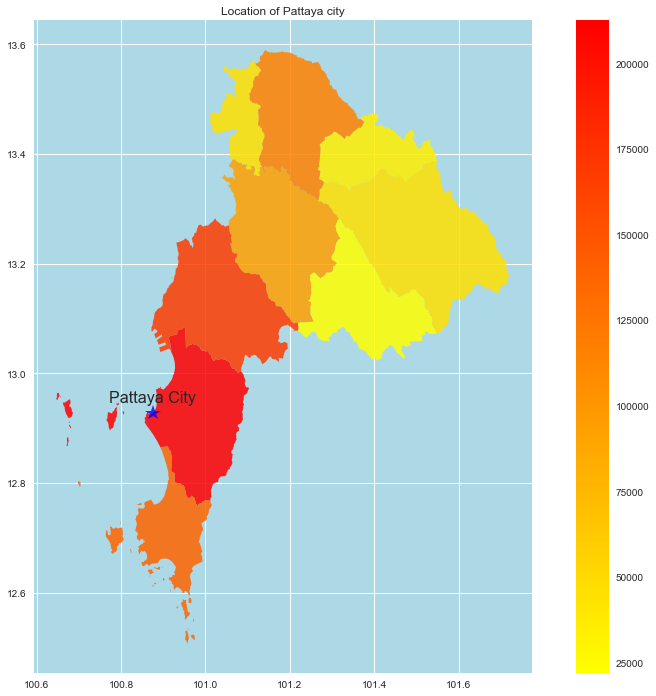

In [65]:
ptt_pop = tha_pop.query('Changwat_EN == "Chon Buri"')

plt.rcParams['figure.figsize'] = [16,12]

fig, ax = plt.subplots()

ptt_pop.plot(
    ax=ax, 
    column='pop', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.85
    )

for c in ptt.keys():

    ax.text(
        x=ptt[c][0], 
        y=ptt[c][1] + 0.02, 
        s=c, 
        fontsize=16,
        ha='center', 
    )

    ax.plot(
        ptt[c][0], 
        ptt[c][1], 
        marker='*',
        markersize=16,
        c='blue', 
        alpha=0.8
    )
ax.set(
        title='Location of Pattaya city', 
        aspect=1.3, 
        facecolor='lightblue'
        )

### Возвращаемся в Бангкок

Для отрисовки карты Бангкока пойдем по этой ссылке http://insideairbnb.com/get-the-data.html. Этот ресурс содержит много инфы по разным городам взятой из Air BnB. Там есть и Бангкок. Нам нужен этот файл:  bkk_neighbourhoods.geojson

In [74]:
# Загружаем данные
bkk_neighbourhoods_df = gpd.read_file('c:/Users/Vladimir/Coding/CSV_Datasets/Thailand_geomaps/bkk_neighbourhoods.geojson')


bkk_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Bang Phlat,None,"MULTIPOLYGON (((100.51649 13.80034, 100.51622 ..."
1,Huai Khwang,None,"MULTIPOLYGON (((100.58853 13.80282, 100.58852 ..."
2,Wang Thong Lang,None,"MULTIPOLYGON (((100.61295 13.79495, 100.61306 ..."
3,Thawi Watthana,None,"MULTIPOLYGON (((100.39673 13.80187, 100.39802 ..."
4,Lat Krabang,None,"MULTIPOLYGON (((100.79514 13.79399, 100.79516 ..."


In [75]:
bkk_neighbourhoods_df.shape

(50, 3)

Попробуем отрисовать карту на основе этого датафрейма

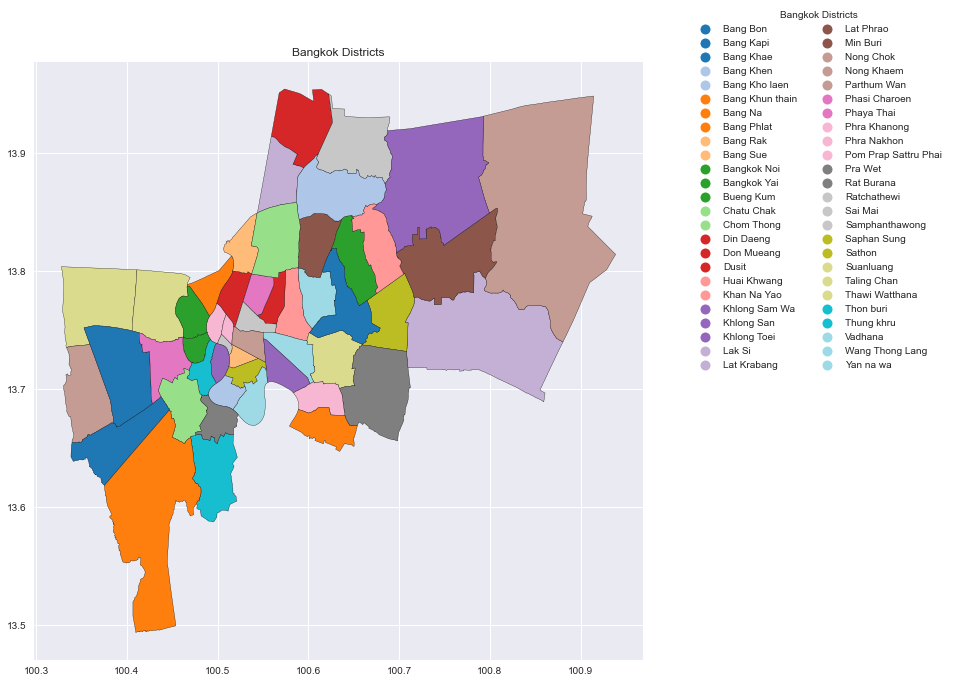

In [83]:
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()


bkk_neighbourhoods_df.plot(
    ax=ax, 
    column='neighbourhood',
    categorical=True, 
    legend=True, 
    legend_kwds={'title': 'Bangkok Districts', "ncol": 2,'loc': 'upper right', "bbox_to_anchor": (1.005,0.1, 0.5, 1)},
    cmap='tab20', 
    edgecolor='black'
)

ax.set(
    title='Bangkok Districts', 
    aspect=1.3
);

Теперь попробуем найти на карте Бангкока расположение самых известных достопримечательностей столицы. За списком лакаций пойдем в Гугл, а их координаты найдем через тот же Nominatim

In [67]:
bkk_locations = [
'The Grand Palace',
'Floating Market Bangkok',
'Khaosan Road',
'Wat Arun Bangkok',
'Chatuchak Market',
'Wat Pho Bangkok',
'Sea Life Bangkok Ocean World',
'Bangkok Safari World',
'Siam Park City Bangkok',
'Siam Serpentarium',
'Dusit Zoo Bangkok',
'Wat Traimit',
'Wat Suthat',
'Chatuchak Market'
]

In [68]:
from geopy import Nominatim

In [69]:
def lat_lng_from_string_loc(x):
    
    locator = Nominatim(user_agent='myGeocoder')

    location = locator.geocode(x)
    
    if location is None:
        None
    else:
        return location.longitude, location.latitude

In [70]:
bkk_locations_geo = {
    x: lat_lng_from_string_loc(x) 
    for x in bkk_locations 
}
bkk_locations_geo

{'The Grand Palace': (100.4918642714286, 13.7493514),
 'Floating Market Bangkok': (100.41558074643638, 13.7607541),
 'Khaosan Road': (100.4975792, 13.7587665),
 'Wat Arun Bangkok': (100.48848833622938, 13.743913150000001),
 'Chatuchak Market': (100.552238, 13.801113),
 'Wat Pho Bangkok': (100.49277659665174, 13.746245349999999),
 'Sea Life Bangkok Ocean World': (100.5351985, 13.7469747),
 'Bangkok Safari World': (100.70305974351025, 13.8650168),
 'Siam Park City Bangkok': (100.69335005120202, 13.80659335),
 'Siam Serpentarium': (100.82371994341096, 13.7105961),
 'Dusit Zoo Bangkok': (100.51647448428497, 13.77189245),
 'Wat Traimit': (100.51370225472775, 13.73790505),
 'Wat Suthat': (100.50093264749908, 13.75008305)}

Итак, координаты получили. Теперь создадим 2 списка - короткий и полный. 

In [71]:
bkk_locations_short={
 'Floating Market Bangkok': (100.41558074643638, 13.7607541),
 'Khaosan Road': (100.4975792, 13.7587665),
 'Chatuchak Market': (100.552238, 13.801113),
 'Sea Life Bangkok Ocean World': (100.5351985, 13.7469747),
 'Bangkok Safari World': (100.70305974351025, 13.8650168),
 'Siam Park City Bangkok': (100.6929612, 13.8054903),
 'Siam Serpentarium': (100.82371994341096, 13.7105961),
 'Dusit Zoo Bangkok': (100.51647448428497, 13.77189245)}

In [72]:
bkk_locations_full={'The Grand Palace': (100.4918642714286, 13.7493514),
 'Floating Market Bangkok': (100.41558074643638, 13.7607541),
 'Khaosan Road': (100.4975792, 13.7587665),
 'Wat Arun Bangkok': (100.48848833622938, 13.743913150000001),
 'Chatuchak Market': (100.552238, 13.801113),
 'Wat Pho Bangkok': (100.49277659665174, 13.746245349999999),
 'Sea Life Bangkok Ocean World': (100.5351985, 13.7469747),
 'Bangkok Safari World': (100.70305974351025, 13.8650168),
 'Siam Park City Bangkok': (100.6929612, 13.8054903),
 'Siam Serpentarium': (100.82371994341096, 13.7105961),
 'Dusit Zoo Bangkok': (100.51647448428497, 13.77189245)}

Посмотрим на карте короткий список

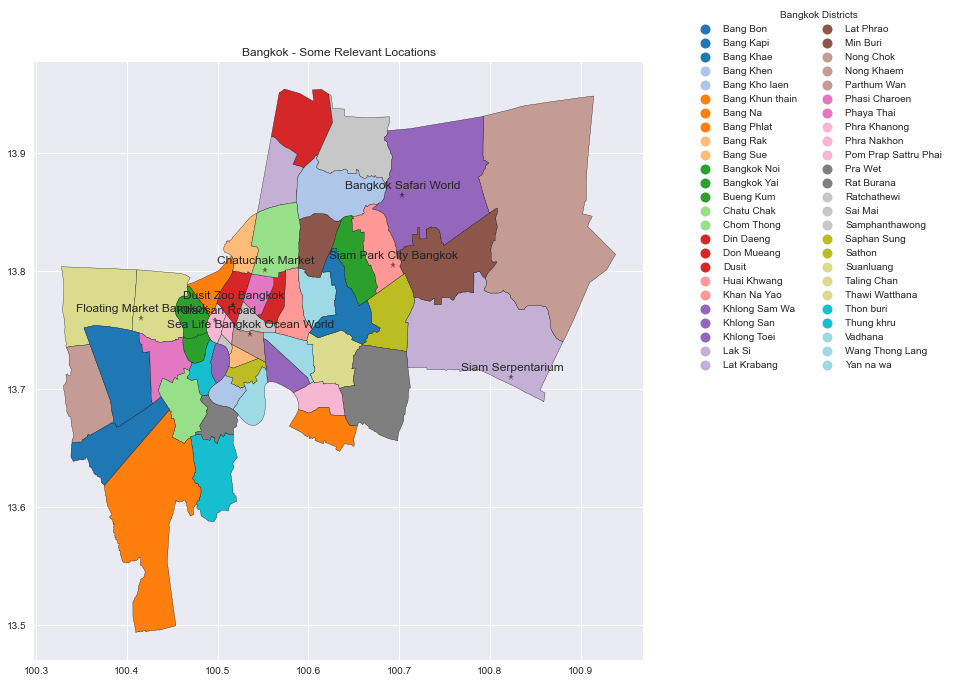

In [85]:
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()


bkk_neighbourhoods_df.plot(
    ax=ax, 
    column='neighbourhood',
    categorical=True, 
    legend=True, 
    legend_kwds={'title': 'Bangkok Districts', "ncol": 2,'loc': 'upper right', "bbox_to_anchor": (1.005,0.1, 0.5, 1)},
    cmap='tab20', 
    edgecolor='black')

for c in bkk_locations_short.keys():

    ax.text(
        x=bkk_locations_short[c][0]+ 0.001, 
        y=bkk_locations_short[c][1] + 0.005, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        bkk_locations_short[c][0], 
        bkk_locations_short[c][1], 
        marker='*',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Bangkok - Some Relevant Locations', 
    aspect=1.3
);


Из-за того, что большинство самых известных локаций столицы находятся географически совсем рядом друг с другом, при отображении их названия накладываются друг на друга на карте и получается дикая мешанина. Поэтому, в короткий список я внес по возможности удаленные друг от друга локации. Ну, а полный список мы тоже не бросим. Его мы попробуем наложить на карту Бангкока отрисованую с помощью Open Street Map. А поможет нам в этом библиотека mplleaflet, которая преобразует матплотлибовский формат в красивую, интерактивную веб-страницу с картой.

In [86]:
import mplleaflet

fig, ax = plt.subplots()

bkk_neighbourhoods_df.plot(
    ax=ax, 
    alpha=0.2
)

bkk_neighbourhoods_df.plot(
    ax=ax, 
    column='neighbourhood',
    categorical=True, 
    cmap='tab20',
)

for c in bkk_locations_full.keys():
    
    ax.text(
        x=bkk_locations_full[c][0]+ 0.001, 
        y=bkk_locations_full[c][1] + 0.005, 
        s=c, 
        fontsize=12,
        ha='center', 
        )

    ax.plot(
        bkk_locations_full[c][0], 
        bkk_locations_full[c][1], 
        marker='*',
        markersize=16,
        c='red', 
        alpha=0.5
        )


mplleaflet.show(fig=fig) # откроет вотдельной вкладке браузера

C:\Users\Vladimir\Anaconda3\envs\geo_env\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]


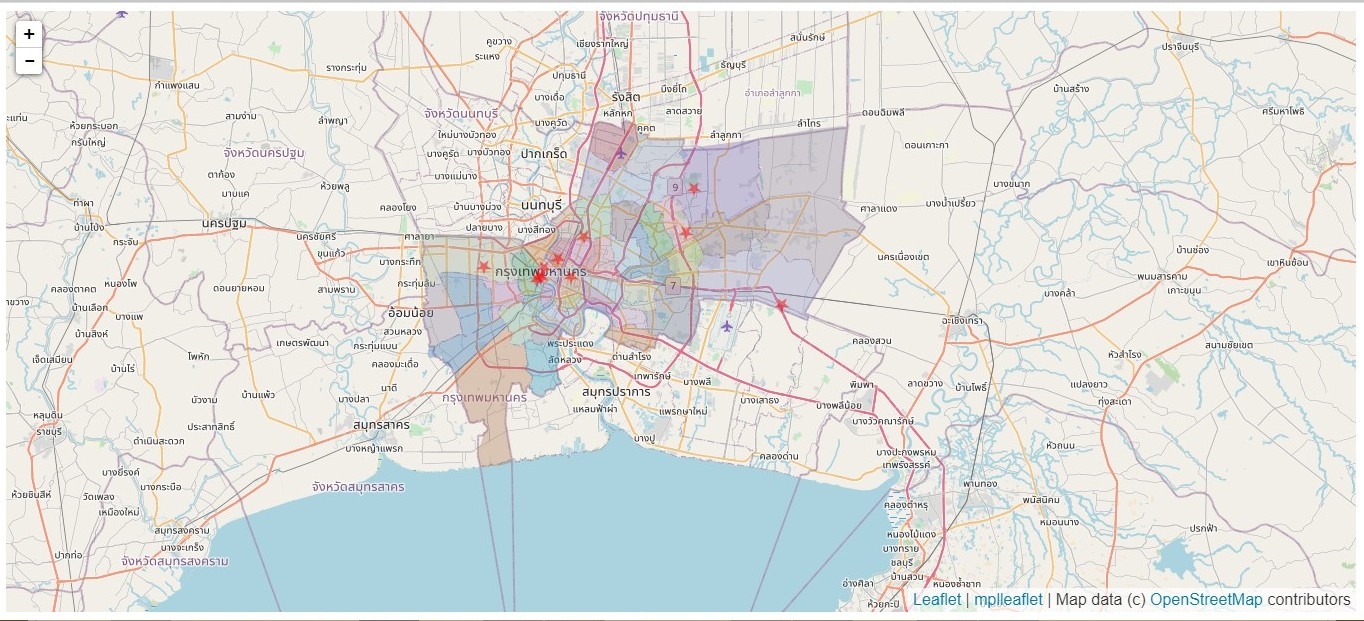

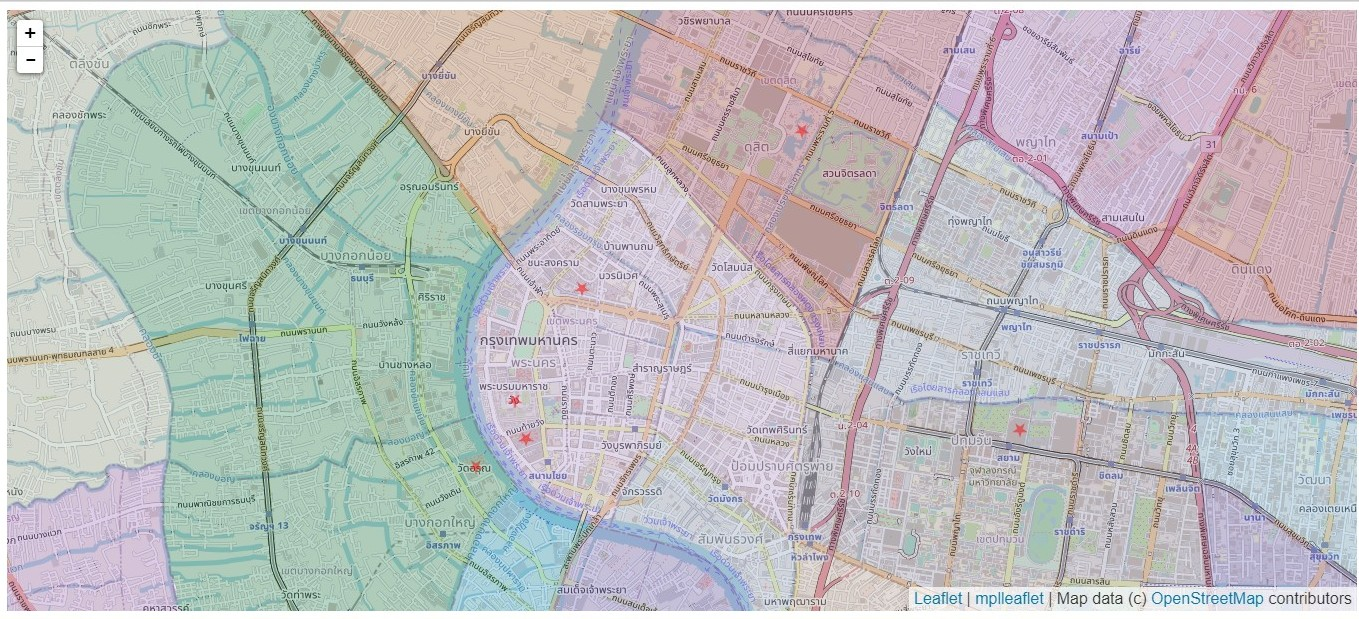

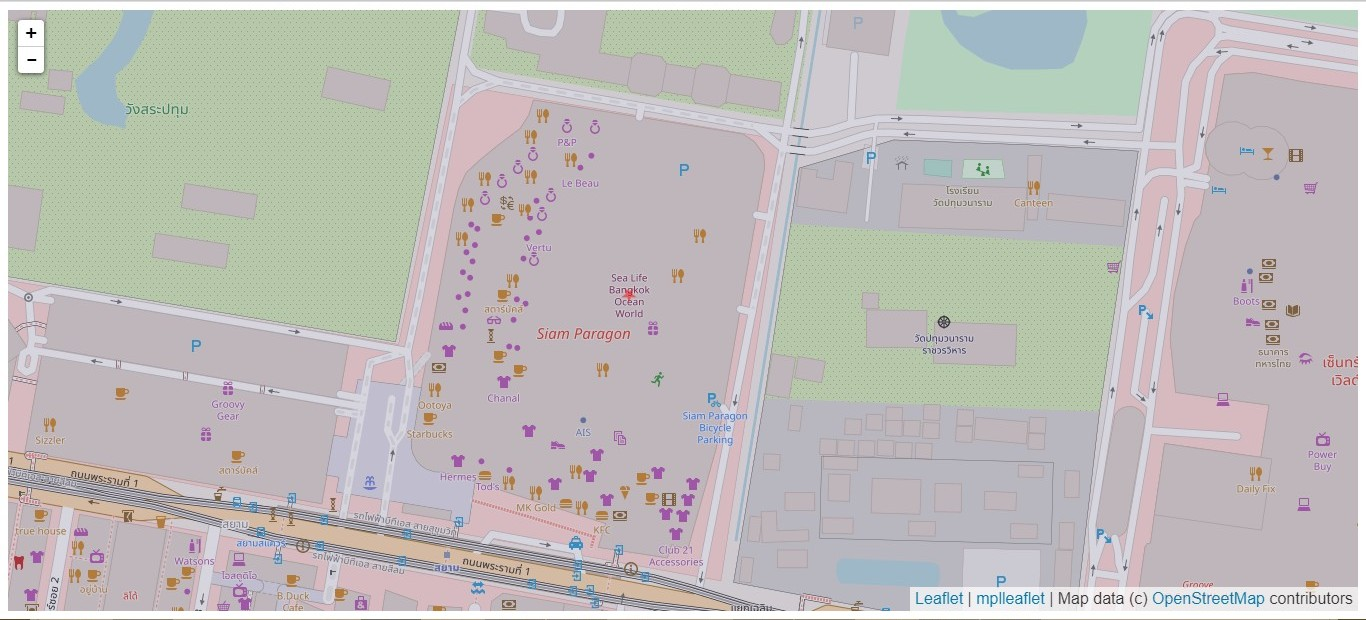

Вот такая красота!